In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import requests
from urllib.parse import urlencode

%matplotlib inline

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика

In [2]:
df = pd.read_csv('/home/jupyter-v-kichigin/lesson_1/step_1_lesson_7.csv')

In [3]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [4]:
df_1 = df.query('user_type == "People"')

In [5]:
df_2 = df.query('user_type == "Robots"')

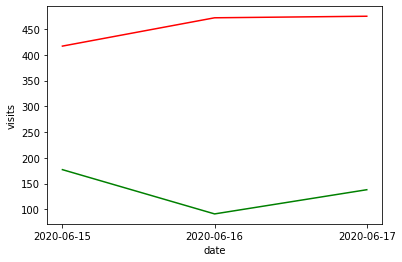

In [6]:
sns.lineplot(data = df_1, x = df_1.date, y = df_1.visits, color = 'Red')
sns.lineplot(data = df_2, x = df_2.date, y = df_2.visits, color = 'Green')

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome

In [7]:
df2 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv')

In [8]:
df2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [9]:
df2['percent'] = df2.visits / df2.visits.sum() * 100

In [10]:
df2

,date,browser,visits,percent
0,2020-06-15,Google Chrome,354.0,59.595960
1,2020-06-15,Firefox,58.0,9.764310
2,2020-06-15,Yandex Browser,54.0,9.090909
3,2020-06-15,Safari,41.0,6.902357
4,2020-06-15,Chrome Mobile,31.0,5.218855
5,2020-06-15,Opera,16.0,2.693603
6,2020-06-15,Mobile Safari,16.0,2.693603
7,2020-06-15,Samsung Internet,9.0,1.515152
8,2020-06-15,Edge,5.0,0.841751
9,2020-06-15,UCWEB,4.0,0.673401


Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

In [11]:
df3 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv')

In [12]:
df3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [13]:
df3_totalvisits = df3.groupby('browser', as_index = False).agg({'visits':'sum'}).rename(columns = {'visits':'total_visits'})

In [14]:
df3_robots = df3.query('user_type=="Robots"')

In [15]:
df3_totalvisits = df3_totalvisits.merge(df3_robots, on = 'browser')

In [16]:
df3_totalvisits

,browser,total_visits,date,user_type,visits
0,Chromium,2.0,2020-06-15,Robots,1.0
1,Edge,5.0,2020-06-15,Robots,1.0
2,Firefox,58.0,2020-06-15,Robots,31.0
3,Google Chrome,354.0,2020-06-15,Robots,104.0
4,Mobile Safari,16.0,2020-06-15,Robots,1.0
5,Opera,16.0,2020-06-15,Robots,5.0
6,Safari,41.0,2020-06-15,Robots,22.0
7,Samsung Internet,9.0,2020-06-15,Robots,1.0
8,UCWEB,4.0,2020-06-15,Robots,4.0
9,Yandex Browser,54.0,2020-06-15,Robots,7.0


In [17]:
df3_totalvisits['percent'] = df3_totalvisits.visits / df3_totalvisits.total_visits * 100

In [18]:
df3_totalvisits

,browser,total_visits,date,user_type,visits,percent
0,Chromium,2.0,2020-06-15,Robots,1.0,50.000000
1,Edge,5.0,2020-06-15,Robots,1.0,20.000000
2,Firefox,58.0,2020-06-15,Robots,31.0,53.448276
3,Google Chrome,354.0,2020-06-15,Robots,104.0,29.378531
4,Mobile Safari,16.0,2020-06-15,Robots,1.0,6.250000
5,Opera,16.0,2020-06-15,Robots,5.0,31.250000
6,Safari,41.0,2020-06-15,Robots,22.0,53.658537
7,Samsung Internet,9.0,2020-06-15,Robots,1.0,11.111111
8,UCWEB,4.0,2020-06-15,Robots,4.0,100.000000
9,Yandex Browser,54.0,2020-06-15,Robots,7.0,12.962963


Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

In [19]:
df4 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv')

In [20]:
df4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [21]:
df4['percent'] = df4.visits / df4.visits.sum() * 100

In [22]:
df4['percent'] = df4.percent.round(1)

In [23]:
df4.query('browser == "Safari"')

,date,browser,user_type,visits,percent
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2


Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека в разрезе по браузеру и значениям Robots/People.

In [24]:
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df5 = pd.read_csv(BytesIO(data))

In [25]:
df6 = df5.merge(df4)

In [26]:
df6['visits_user'] = df6.visits / df6.users

In [27]:
df6

,date,browser,user_type,users,visits,percent,visits_user
0,2020-06-15,Google Chrome,People,240.0,250.0,42.1,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.5,1.000000
2,2020-06-15,Yandex Browser,People,44.0,47.0,7.9,1.068182
3,2020-06-15,Chrome Mobile,People,30.0,31.0,5.2,1.033333
4,2020-06-15,Firefox,Robots,29.0,31.0,5.2,1.068966
5,2020-06-15,Firefox,People,26.0,27.0,4.5,1.038462
6,2020-06-15,Safari,Robots,20.0,22.0,3.7,1.100000
7,2020-06-15,Safari,People,17.0,19.0,3.2,1.117647
8,2020-06-15,Mobile Safari,People,14.0,15.0,2.5,1.071429
9,2020-06-15,Opera,People,10.0,11.0,1.9,1.100000


В рамках дополнительного проекта попробуем освоить API, позволяющий получать данные о музейных коллекциях. Это задание может пригодиться для большего понимания того, какими способами можно собирать и обрабатывать данные, например, для собственного проекта или другой рабочей задачи.

In [28]:
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=sunflowers')
res = r.json()

In [30]:
res

{'total': 45,
 'objectIDs': [436524,
  705155,
  11922,
  816522,
  2032,
  343052,
  20141,
  208554,
  2019,
  360837,
  207869,
  761604,
  707887,
  400581,
  423400,
  57922,
  193938,
  208218,
  437984,
  202228,
  436534,
  437329,
  436252,
  436580,
  363282,
  190739,
  207753,
  437526,
  347980,
  822570,
  203893,
  423237,
  13644,
  820022,
  761731,
  814626,
  207967,
  205386,
  436529,
  436121,
  436144,
  369073,
  436530,
  436535,
  437980]}

На предыдущем шаге мы получили результаты поиска. Следущий этап – собрать информацию об этих объектах.
Выполните запрос для объекта 437980.

In [31]:
r_test = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/437980')
obj_test = r_test.json()

In [32]:
obj_test

{'objectID': 437980,
 'isHighlight': False,
 'accessionNumber': '49.30',
 'accessionYear': '1949',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/DP130999.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DP130999.jpg',
 'additionalImages': [],
 'constituents': [{'constituentID': 161947,
   'role': 'Artist',
   'name': 'Vincent van Gogh',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500115588',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q5582',
   'gender': ''}],
 'department': 'European Paintings',
 'objectName': 'Painting',
 'title': 'Cypresses',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Vincent van Gogh',
 'artistDisplayBio': 'Dutch, Zundert 1853–1890 Auvers-sur-Oise',
 'artistSuffix': '',
 'artistAlphaSort': 'Gogh, Vincent van',
 'artistNationality': 'Dutch',
 'artistB

Теперь напишите цикл, с помощью которого будет собрана информация об объектах. Результаты запишите в датафрейм, а именно – следующие параметры:

    objectID – id объекта
    title – название
    artistDisplayName – автор
    department – департамент
    objectBeginDate – дата (начало)
    objectEndDate – дата (конец)
    period – название периода
    objectName – название/категория объекта
    culture – культура

Сколько объектов относятся к японской культуре? (culture –Japan)

In [33]:
res_list = res['objectIDs']

In [82]:
df_lst = []

In [90]:
for res in res_list:
    link = "https://collectionapi.metmuseum.org/public/collection/v1/objects/" + str(res)
    r_test = requests.get(link)
    obj_test = r_test.json()
    mini_df = pd.DataFrame(obj_test, index = ['objectID'], columns = ['objectID', 
                                                                      'title', 
                                                                      'artistDisplayName', 
                                                                      'department', 
                                                                      'objectBeginDate', 
                                                                      'objectEndDate', 
                                                                      'period', 
                                                                      'objectName', 
                                                                      'culture'])
    df_lst.append(mini_df)

In [91]:
big_df2 = pd.concat(df_lst, ignore_index=True)

In [92]:
big_df2

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,436524,Sunflowers,Vincent van Gogh,European Paintings,1887,1887,,Painting,
1,705155,Fan Design with Cats and Sunflowers,Henri-Charles Guérard,Drawings and Prints,1880,1895,,Drawing,
2,11922,Clytie,William Henry Rinehart,The American Wing,1869,1872,,Sculpture,American
3,816522,Flowers in a Grotesque Vase,Orsola Maddalena Caccia,European Paintings,1630,1640,,Painting,
4,2032,Chest with drawer,,The American Wing,1705,1705,,Chest with drawer,American
5,343052,"Design for a Wall Decoration with Peacock, Cra...",Emile Hurtré,Drawings and Prints,1896,1898,,Drawing Ornament & Architecture,
6,20141,Plaque,Chelsea Keramic Art Works,The American Wing,1875,1885,,Plaque,American
7,208554,Charger,F. Gadesden,European Sculpture and Decorative Arts,1876,1876,,Charger,
8,2019,Chest with drawers,Peter Blin,The American Wing,1675,1700,,Chest with drawers,American
9,360837,Sir Anthony Van Dyck with a Sunflower,Wenceslaus Hollar,Drawings and Prints,1644,1644,,Print,


In [93]:
big_df2.query('culture == "Japan"')

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
15,57922,Incense box,,Asian Art,1700,1799,Edo period (1615–1868),Incense box,Japan


In [103]:
big_df2_dep = big_df2.groupby('department', as_index = False).agg({'objectID':'count'}).sort_values('objectID', ascending = False)

In [104]:
big_df2_dep

,department,objectID
2,European Paintings,14
1,Drawings and Prints,11
3,European Sculpture and Decorative Arts,11
4,The American Wing,8
0,Asian Art,1


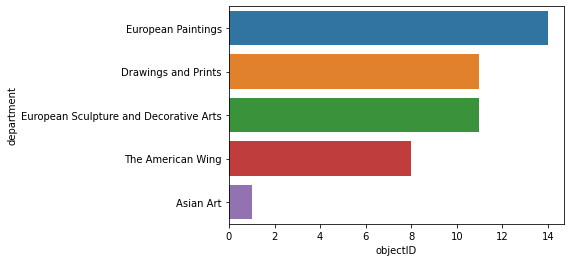

In [105]:
sns.barplot(data = big_df2_dep, x = big_df2_dep.objectID, y = big_df2_dep.department)

Выполните поисковый запрос для департамента "Asian art" (departmentId = 6) с тегом "cat" и запишите id объектов в cat_ids. Используйте уже знакомый цикл, чтобы получить данные о первой 1000 объектов из списка.
В качестве ответа укажите, в каком периоде (period) было выполнено наибольшее количество работ, представленных в музее?

In [108]:
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?departmentId=6&q=cat')
cats = r.json()

In [109]:
cats

{'total': 2713,
 'objectIDs': [49470,
  53222,
  60873,
  70541,
  43402,
  752008,
  47358,
  49467,
  54747,
  54626,
  55919,
  59775,
  36075,
  50826,
  57204,
  53653,
  42922,
  56602,
  47051,
  47052,
  69780,
  59121,
  38952,
  38177,
  39199,
  59903,
  59763,
  73809,
  49050,
  58462,
  45282,
  38160,
  38994,
  39092,
  38162,
  55948,
  54124,
  59248,
  671014,
  58779,
  53001,
  38949,
  671015,
  42932,
  45065,
  56780,
  42915,
  59249,
  51660,
  670898,
  55914,
  39764,
  69410,
  68841,
  55148,
  76442,
  37011,
  36621,
  58218,
  54445,
  57560,
  56070,
  41681,
  53590,
  58002,
  45667,
  50827,
  46723,
  36539,
  38452,
  39695,
  39698,
  39699,
  54809,
  38951,
  75200,
  57106,
  53176,
  38158,
  38176,
  38462,
  38293,
  38315,
  53441,
  52995,
  52994,
  53005,
  53422,
  50780,
  70582,
  73158,
  670965,
  53172,
  75747,
  671023,
  53408,
  53203,
  53007,
  53200,
  53457,
  53231,
  53416,
  53157,
  53234,
  53414,
  52996,
  53006,
  

In [110]:
cats_lst = cats['objectIDs']

In [125]:
dfcats_lst = []

In [126]:
circle = 0
for cat in cats_lst:
    circle += 1
    if circle == 1001:
        break
    else:
        link = "https://collectionapi.metmuseum.org/public/collection/v1/objects/" + str(cat)
        r_test = requests.get(link)
        obj_test = r_test.json()
        mini_df = pd.DataFrame(obj_test, index = ['objectID'], columns = ['objectID', 
                                                                          'title', 
                                                                          'artistDisplayName', 
                                                                          'department', 
                                                                          'objectBeginDate', 
                                                                          'objectEndDate', 
                                                                          'period', 
                                                                          'objectName', 
                                                                          'culture'])
        dfcats_lst.append(mini_df)

In [128]:
big_cats_df = pd.concat(dfcats_lst, ignore_index=True)

In [129]:
big_cats_df

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,49470,Cat,Wang Li,Asian Art,1813,1879,Qing dynasty (1644–1911),Hanging scroll,China
1,53222,Musk Cat,Uto Gyoshi,Asian Art,1550,1599,Muromachi period (1392–1573),Hanging scroll,Japan
2,60873,Burial Crown,,Asian Art,960,1279,Song dynasty (960–1279) or later,Burial crown,China
3,70541,Woman's Ceremonial Robe,,Asian Art,1800,1899,Qing dynasty (1644–1911),Woman's ceremonial robe,China
4,43402,Vitrine Containing Twenty-Five Ornaments,,Asian Art,1700,1899,Qing dynasty (1644–1911),Ornaments in vitrine,China
...,...,...,...,...,...,...,...,...,...
995,63002,Bowl,,Asian Art,1820,1820,Edo period (1615–1868),Bowl,Japan
996,37088,"Narumi, Meisan Arimatsu Shibori Mise",Utagawa Hiroshige,Asian Art,1855,1855,Edo period (1615–1868),Print,Japan
997,37052,Suruga Street,Utagawa Hiroshige,Asian Art,1826,1846,Edo period (1615–1868),Print,Japan
998,76989,Kimono with Stylized Flowing Water,,Asian Art,1926,1950,Shōwa period (1926–89),Kimono,Japan


In [131]:
big_cats_df.groupby('period', as_index = False).agg({'objectID':'count'}).sort_values('objectID')

,period,objectID
54,"Ming dynasty (1368–1644), Zhengde mark and per...",1
73,Northern Wei dynasty (386–524),1
72,Northern Wei (386–534)–Northern Qi (550–577) d...,1
69,"Neolithic, Majiayao culture, Banshan phase",1
68,Nara (710–794)–Edo (1615–1868) period,1
...,...,...
64,Muromachi period (1392–1573),32
42,Ming dynasty (1368–1644),49
77,Qing dynasty (1644–1911),50
0,,82
